Today's Date is:  2023-01-07
[*********************100%***********************]  1 of 1 completed
822
[20.5        19.06999969 20.25       18.94000053 19.04000092 19.44000053
 19.02000046 19.36000061 19.32999992 19.5        20.47999954 21.39999962
 26.         24.70000076 24.79999924 25.70000076 25.59000015 24.84000015
 24.96999931 23.68000031 24.14999962 24.96999931 24.97999954 24.79999924
 25.         24.18000031 24.875      24.98999977 24.01000023 24.5
 27.04000092 29.85000038 29.57999992 30.15999985 29.01000023 24.62000084
 25.56999969 23.87000084 22.69000053 23.54999924 25.18000031 25.18000031
 25.13999939 25.61000061 24.15999985 26.04999924 27.31999969 30.69000053
 35.70000076 39.36999893 36.88999939 33.29999924 33.27000046 32.5
 33.15999985 35.81999969 38.15000153 39.61999893 47.43999863 49.52999878
 48.25       45.88999939 45.29999924 41.         42.74000168 43.56000137
 42.93999863 42.02999878 41.54999924 38.41999817 39.81999969 40.29999924
 42.45999908 39.47999954 38.83000183

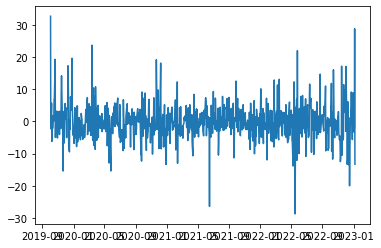

In [1]:
#Welcome to Alpha Vantage! Your API key is: 6NY98HFWJ7HOKS8D. Please record this API key at a safe place for future data access.

# Import yfinance 
import numpy as np
import yfinance as yf   
 
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date 
from datetime import date
today = str(date.today())
print("Today's Date is: ",today)

data = yf.download('APRE','2019-01-01',today) 
 
#data = yf.download(tickers='AAPL', period='1d', interval='1m') #to download 1 day recent data
# Plot the close prices 
import matplotlib.pyplot as plt 

#data.High.plot() 

x=np.array(data.Close)
y=np.array(data.Open)

delta=data.Close-data.Open

d=(np.array(delta)/data.Open)*100

print(len(d))
print(x)
plt.show() 

print(data.Close)

fig1=plt.figure()
ax1=fig1.add_subplot(111)

ax1.plot(d)

print("Mean fluctuation is",np.mean(d))
print("Median fluctuation is",np.median(d))
print("Standara Deviation of the fluctuation is",np.std(d))

In [2]:
print(type(delta))
#print(np.sign(delta))
sign_delta=np.sign(delta)
vc=sign_delta.value_counts()
print(vc)

<class 'pandas.core.series.Series'>
-1.0    438
 1.0    370
 0.0     14
dtype: int64


822
181.9558690430531


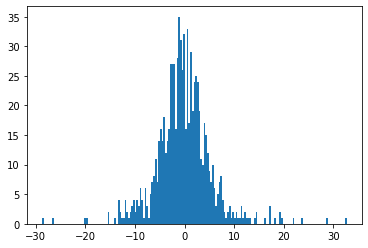

In [3]:
n=len(d)
print(n)
bin=3.49*np.std(d)*(n**(1/3))
print(bin)
counts, bins, bars=plt.hist(d,int(bin))
a=list(zip(counts,bins))

[ 0.00000000e+00  1.63215791e+01  1.01126088e+01  8.99290722e+00
  5.94680084e+00  5.04366489e+00  4.55464114e+00  3.70896119e+00
  3.49547581e+00  3.14592823e+00  3.04061141e+00  3.35205126e+00
  3.65742894e+00  4.77233110e+00  4.12084256e+00  3.81328971e+00
  3.78040941e+00  3.50177315e+00  3.39050907e+00  3.29206373e+00
  2.88928948e+00  2.76361146e+00  2.77808985e+00  2.65900270e+00
  2.53657827e+00  2.35622376e+00  2.11763490e+00  2.15379718e+00
  2.15280600e+00  2.00507246e+00  2.01999230e+00  2.28084725e+00
  2.64049257e+00  2.62165454e+00  2.56486353e+00  2.41183605e+00
  1.92977962e+00  1.95960863e+00  1.73608506e+00  1.57108966e+00
  1.53070075e+00  1.62597622e+00  1.60397045e+00  1.58390647e+00
  1.56180111e+00  1.41765835e+00  1.47685705e+00  1.52606514e+00
  1.84740436e+00  2.09891780e+00  2.23537380e+00  2.03844381e+00
  1.82146066e+00  1.79780346e+00  1.72090329e+00  1.72196264e+00
  1.82565127e+00  1.86964989e+00  1.89820884e+00  2.19351768e+00
  2.22761873e+00  2.13586

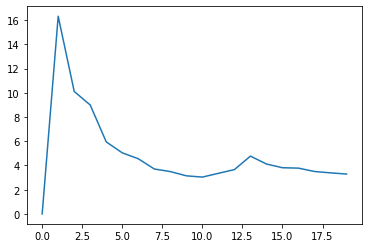

In [4]:
arr=(np.array(d))
moving_d=np.zeros(len(d))
n=1
for i in range(len(d)):
    #a=np.split(arr,{i}[0])
    moving_d[i]=np.sum(arr[0:i])/n
    n+=1
    #moving_d[i]=sum/(i+1)
    #print(f"moving_d{i}={moving_d[i]}")

print(moving_d)

plt.plot(np.arange(0,20,1),moving_d[0:20])

In [5]:
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

#Interval required 1 minute


print(data)

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Uber live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02    84.900002    86.139999    84.342003    86.052002    86.052002   
2020-01-03    88.099998    90.800003    87.384003    88.601997    88.601997   
2020-01-06    88.094002    90.311996    88.000000    90.307999    90.307999   
2020-01-07    92.279999    94.325996    90.671997    93.811996    93.811996   
2020-01-08    94.739998    99.697998    93.646004    98.428001    98.428001   
...                 ...          ...          ...          ...          ...   
2021-10-21   856.000000   900.000000   855.500000   894.000000   894.000000   
2021-10-22   895.500000   910.000000   890.960022   909.679993   909.679993   
2021-10-25   950.530029  1045.020020   944.200012  1024.859985  1024.859985   
2021-10-26  1024.689941  1094.939941  1001.440002  1018.429993  1018.429993   
2021-10-27  1039.660034  1070.880005  1030.780029  1

/bin/bash: pip: command not found


In [7]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='6NY98HFWJ7HOKS8D', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
print(type(data))
pprint(data.head(2))

<class 'pandas.core.frame.DataFrame'>
                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-10-29 20:00:00   331.76   331.76  331.76    331.76     1183.0
2021-10-29 19:56:00   331.90   331.90  331.85    331.85     1360.0
